# Sharing code along with the data using CliMetLab


**Objective**:

The objective of this notebook is to illustrate how to create a climetlab dataset plugin for a dataset form these two files: `forecast_error.csv` and `soil_temperature.csv` (These files are located next to this notebook).

There are three main steps:

- Step 1: Create the plugin boilerplate structure using climetlab-plugin-tools.

- Step 2: Add your code to the plugin.

- Step 3: Push to github and publish to pypi (This is not covered here. See the general purpose tutorial about github and pipy)

## How to run this exercise

This exercise is in the form of a [Jupyter notebook](https://jupyter.org/). It can be "run" in a number of free cloud based environments (see two options below). These require no installation. When you click on one of the links below ([`Open in Colab`](https://colab.research.google.com/github/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/04-dataset-plugin.ipynb) or [`Launch in Deepnote`](https://deepnote.com/launch?url=https://github.com/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/04-dataset-plugin.ipynb)) you will be prompted to create a free account, after which you will see the same page you see here. You can run each block of code by selecting shift+control repeatedly, or by selecting the "play" icon. 

Advanced users may wish to run this exercise on their own computers by first installing [Python](https://www.python.org/downloads/), [Jupyter](https://jupyter.org/install) and [CliMetLab](https://climetlab.readthedocs.io/en/latest/installing.html).

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/04-dataset-plugin.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
    <th><a href="https://deepnote.com/launch?url=https://github.com/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/04-dataset-plugin.ipynb">
        <img src = "https://deepnote.com/buttons/launch-in-deepnote-small.svg" alt = "Kaggle"></th>
  </tr>
</table>

## Let's begin the exercise...

In [2]:
# pip install climetlab --quiet
# --> already done
import os
import subprocess

In [3]:
os.getcwd()

'C:\\Users\\frei_p\\OneDrive - alpiq.com\\ecmwf_mooc_ml\\github_code\\mooc-machine-learning-weather-climate\\tier_2\\data_handling'

In [4]:
# Linux
#!ls *.csv

# Windows
result = subprocess.run("dir *.csv", capture_output=True, text=True,shell=True)
print(result.stdout)

 Datentr„ger in Laufwerk C: ist System
 Volumeseriennummer: 04DC-87D6

 Verzeichnis von C:\Users\frei_p\OneDrive - alpiq.com\ecmwf_mooc_ml\github_code\mooc-machine-learning-weather-climate\tier_2\data_handling

22/02/2023  15:42            18,560 forecast_error.csv
22/02/2023  15:42            17,933 soil_temperature.csv
               2 Datei(en),         36,493 Bytes
               0 Verzeichnis(se), 236,895,289,344 Bytes frei



#### Step 1: Create the plugin boilerplate structure using climetlab-plugin-tools.

In [5]:
!climetlab help


Documented commands (type help <topic>):
availability  decache       index_directory  quit          
benchmark     export_cache  index_url        settings      
cache         grib_info     index_urls       settings_reset
check         help          plugins          versions      

Undocumented commands:
df  dump_index  libraries  plugin_create_dataset  plugin_create_source



Climetlab plugin tools are packaged separately, we need to install them as a plugin in order to have the shell command `climetlab create_plugin_dataset` available.

In [6]:
!pip install climetlab-plugin-tools --quiet --proxy=""

You should consider upgrading via the 'c:\users\frei_p\onedrive - alpiq.com\ecmwf_mooc_ml\github_code\mooc-machine-learning-weather-climate\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
!climetlab help


Documented commands (type help <topic>):
availability  decache       index_directory  quit          
benchmark     export_cache  index_url        settings      
cache         grib_info     index_urls       settings_reset
check         help          plugins          versions      

Undocumented commands:
df  dump_index  libraries  plugin_create_dataset  plugin_create_source



Run from a shell terminal:

$ climetlab

(climetlab) plugin_create_dataset

Answer questions...

A new folder has now been created with all the code required to have a proper pip python package and have code included in a climetlab dataset plugin.

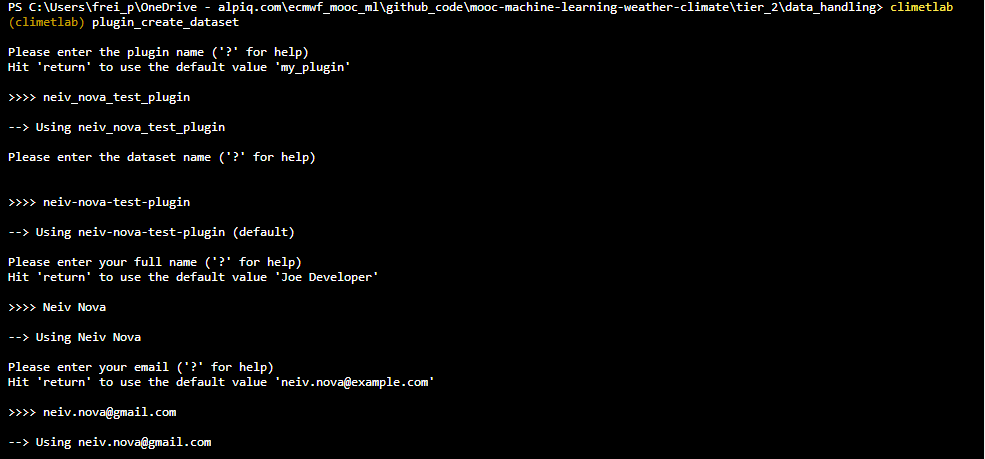
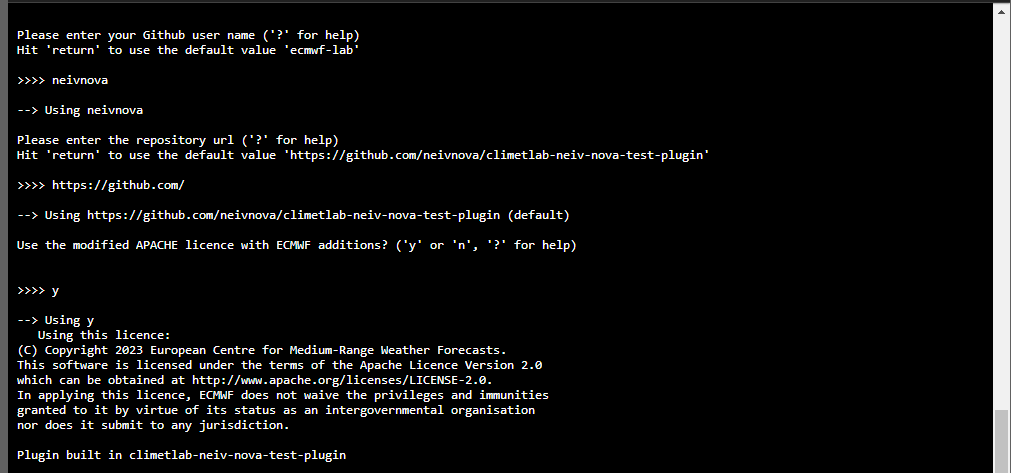
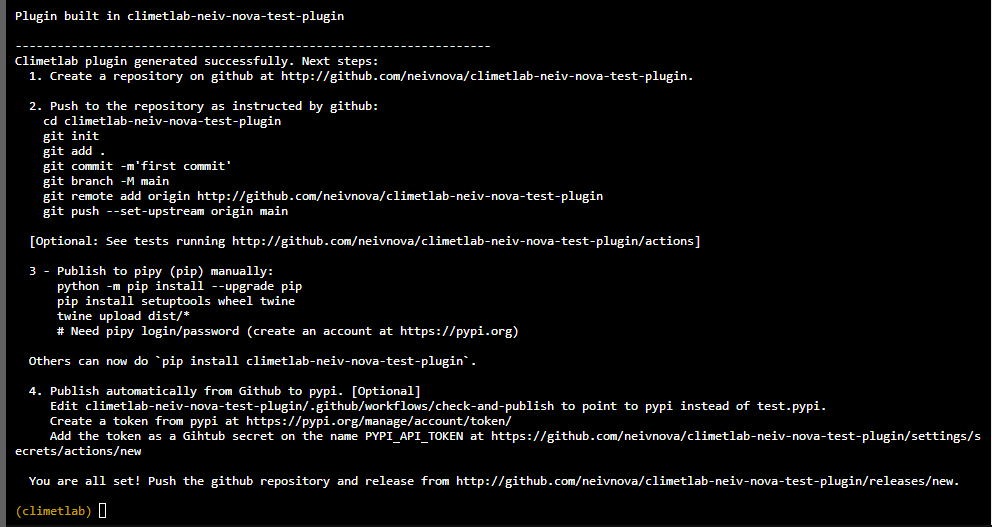

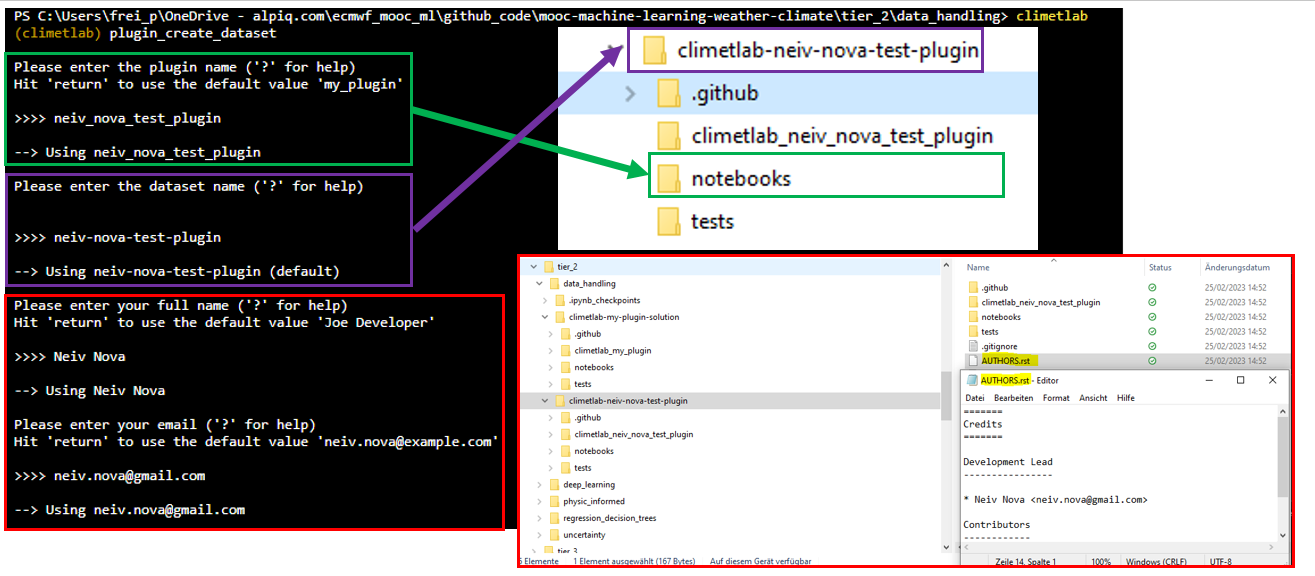

#### Step 2: Add your code to the plugin.

The previous created boilerplate code, let us now write some actual code to link it to the data.

Here is the file you want to edit.

In [8]:
#linux 
#!ls climetlab-*/climetlab_*/*.py

# Windows
result = subprocess.run("dir climetlab-neiv-nova-test-plugin\climetlab_neiv_nova_test_plugin\*.py", capture_output=True, text=True,shell=True)
print(result.stdout)
result

 Datentr„ger in Laufwerk C: ist System
 Volumeseriennummer: 04DC-87D6

 Verzeichnis von C:\Users\frei_p\OneDrive - alpiq.com\ecmwf_mooc_ml\github_code\mooc-machine-learning-weather-climate\tier_2\data_handling\climetlab-neiv-nova-test-plugin\climetlab_neiv_nova_test_plugin

25/02/2023  22:01             1,607 main.py
25/02/2023  14:52               297 __init__.py
               2 Datei(en),          1,904 Bytes
               0 Verzeichnis(se), 236,892,348,416 Bytes frei



CompletedProcess(args='dir climetlab-neiv-nova-test-plugin\\climetlab_neiv_nova_test_plugin\\*.py', returncode=0, stdout=' Datentr„ger in Laufwerk C: ist System\n Volumeseriennummer: 04DC-87D6\n\n Verzeichnis von C:\\Users\\frei_p\\OneDrive - alpiq.com\\ecmwf_mooc_ml\\github_code\\mooc-machine-learning-weather-climate\\tier_2\\data_handling\\climetlab-neiv-nova-test-plugin\\climetlab_neiv_nova_test_plugin\n\n25/02/2023  22:01             1,607 main.py\n25/02/2023  14:52               297 __init__.py\n               2 Datei(en),          1,904 Bytes\n               0 Verzeichnis(se), 236,892,348,416 Bytes frei\n', stderr='')

In [9]:
from climetlab.decorators import normalize

@normalize("parameter", ["tp", "t2m"])
def __init__(self, year, parameter):
    request = dict(parameter=parameter, url=URL, year=year)
    self.source = cml.load_source("url-pattern", PATTERN, request)

Let us edit this part and change it to:

In [10]:
def __init__(self, parameter):
    self.source = cml.load_source("file", parameter + '.csv')
    # For a real plugin use "url" or "url-pattern" sources:
    # self.source = cml.load_source("url", URL_PREFIX + parameter + '.csv')
    # self.source = cml.load_source("url-pattern", PATTERN, {"parameter": parameter} )

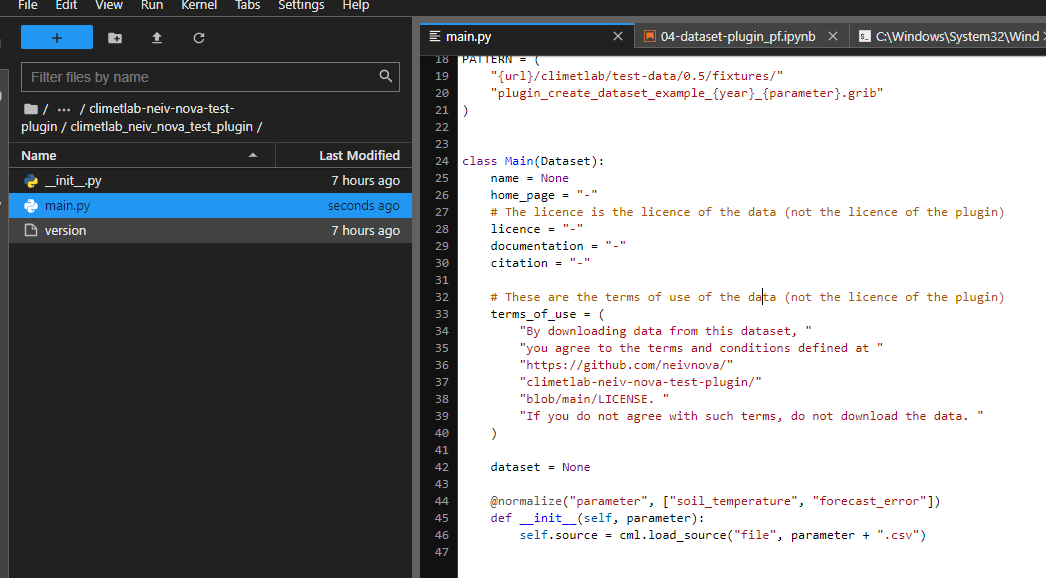

The `pip` plugin package need now to be installed. 

As an example a plugin is available next to this notebook in `./climetlab-my-plugin-solution`. Adapt the name to use the plugin name you defined.

In [53]:
# !pip install -e ./climetlab-my-plugin        # installing your own plugin
# !pip install -e ./climetlab-your-plugin-name # installing your own plugin

!pip install -e .\climetlab-neiv-nova-test-plugin# installing the solution plugin

ERROR: .\climetlab-neiv-nova-test-plugin# is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).
You should consider upgrading via the 'c:\users\frei_p\onedrive - alpiq.com\ecmwf_mooc_ml\github_code\mooc-machine-learning-weather-climate\venv\scripts\python.exe -m pip install --upgrade pip' command.


Execute `pip install -e .\climetlab-neiv-nova-test-plugin` in a terminal!


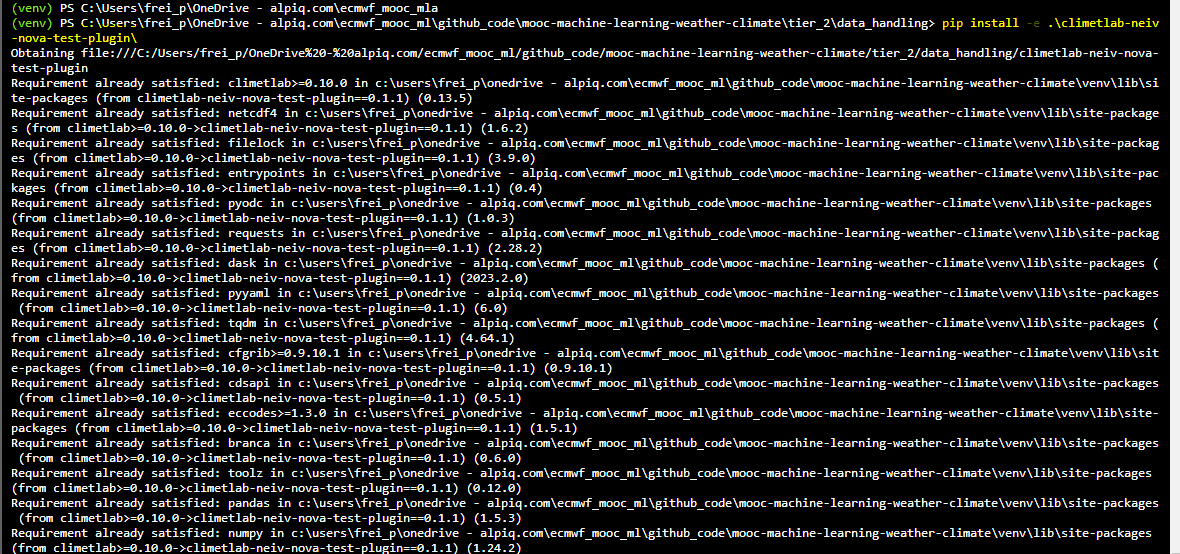


Note: using -e with pip
Warning for Jupyter users: you may need to restart your python notebook.


Let us test this. From a notebook or from ipython or from a python script:

In [11]:
import climetlab as cml 
ds = cml.load_dataset('neiv-nova-test-plugin', parameter = 'soil_temperature')
ds.to_pandas()


By downloading data from this dataset, you agree to the terms and conditions defined at https://github.com/neivnova/climetlab-neiv-nova-test-plugin/blob/main/LICENSE. If you do not agree with such terms, do not download the data. 


NotImplementedError: climetlab.readers.text.TextReader.to_pandas() on soil_temperature.csv

In [12]:
ds = cml.load_dataset('neiv-nova-test-plugin', parameter = 'forecast_error')
ds.to_pandas()

NotImplementedError: climetlab.readers.text.TextReader.to_pandas() on forecast_error.csv

# Improving data usability
Data can be accessed as a panda dataframe. Can we do better to help the end-user handling the data?

What about helping them fixing a typo?

In [13]:
import climetlab as cml
cml.load_dataset('neiv-nova-test-plugin', parameter = 'soiltemperature')
# For Github actions: skip

ValueError: Invalid value 'soiltemperature', possible values are ['soil_temperature', 'forecast_error'] (EnumSingleOrListType)

Let us replace this error message 

	`FileNotFoundError: [Errno 2] No such file or directory: 'soiltemperature.csv'`

by a more helpful error message such as:

	`Invalid value 'soiltemperature', possible values are ['soil_temperature', 'forecast_error'] (EnumSingleOrListType)`

In [18]:
# Add the climetlab decorator `@normalize`
from climetlab.decorators import normalize

@normalize("parameter", ['soil_temperature', 'forecast_error'])
def __init__(self, parameter):
    self.source = cml.load_source("file", parameter + '.csv')

# And retry previous cell (You may need to restart kernel after doing pip install)

# If you installed the plugin package with -e, you do not need to reinstall it.
# If you did not use -e, you need to reinstall the plugin package to update it.

In [19]:
import climetlab as cml
cml.load_dataset('my-plugin', parameter = 'soiltemperature')
# For Github actions: skip

ValueError: Invalid value 'soiltemperature', possible values are ['soil_temperature', 'forecast_error'] (EnumSingleOrListType)

This also takes care of using lower and uppercase letters:

In [ ]:
import climetlab as cml
ds = cml.load_dataset('my-plugin', parameter = 'SOIL_TEMPERATURE') # ok
ds = cml.load_dataset('my-plugin', parameter = 'Soil_Temperature') # ok

## Dates time parameters
Date and time are so ubiquitous in the climate and meteorology domains that we have developed specific tools to handle these input arguments.

Similar to `@normalize("parameter", ['soil_temperature', 'forecast_error'])`

Adding `@normalize("argument", "date(%Y-%m-%d)")` transforms the input as a string with the requested format.

Relevant CliMetLab documentation: https://climetlab.readthedocs.io/en/latest/contributing/normalize.html

# CliMetLab dataset plugin blueprint features

Here is a minimal example: https://github.com/ecmwf/climetlab-demo-dataset

Here is a real-life example: https://github.com/mchantry/climetlab-mltc-surface-observation-postprocessing

- Python pip package structure:
	- setup.py + MANIFEST
	- version file
- README
	- Links to notebook in colab/binder/etc. 
- Examples in notebooks:
	- Used in README links
	- Tested in github actions.
- Test in tests/*
	- Using pytest.
	- Used in github actions.
- Github actions: yaml files in .github/workflows/*.yml
	- Check code quality
	- Run tests (fron tests/*.py) on various platform and python versions
- Automated release of the pip package from github (need and account on pypi.org)
	- Make sure the tests pass.
	- Update the */version file
	- Trigger a release : https://docs.github.com/en/repositories/releasing-projects-on-github/managing-releases-in-a-repository
- Legal stuff: LICENCE/AUTHOR/CONTRIBUTORS


Compare to https://github.com/ecmwf/climetlab-demo-source/blob/master/climetlab_demo_source/__init__.py

Compare to https://github.com/ecmwf-lab/climetlab-google-drive-source/blob/main/climetlab_google_drive_source/__init__.py